In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df=pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\Ship_Performance_Dataset.csv")

In [3]:
df.head(5)

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

In [5]:
def explore_ship_data(df):
    print("Basic Dataset Information:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\nColumn names:")
    print(df.columns.tolist())

    print("Data Types and Non-Null Counts:")
    print(df.info())

    print("Summary Statistics:")
    print(df.describe().T)

    print("Null Values:")
    null_counts = df.isnull().sum()
    print(null_counts[null_counts > 0])
    
    return

In [6]:
explore_ship_data(df)

Basic Dataset Information:
Number of rows: 2736
Number of columns: 18

Column names:
['Date', 'Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD', 'Turnaround_Time_hours', 'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Average_Load_Percentage']
Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground

In [7]:
def explore_Categorical(df):
    print("Unique Values in Categorical Columns:")
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        print(f"\n{col}:")
        print(df[col].value_counts())
    return

In [8]:
explore_Categorical(df)

Unique Values in Categorical Columns:

Date:
Date
2023-06-04    48
2023-12-24    48
2024-01-07    48
2024-01-14    48
2024-01-21    48
2024-01-28    48
2024-02-04    48
2024-02-11    48
2024-02-18    48
2024-02-25    48
2024-03-03    48
2024-03-10    48
2024-03-17    48
2024-03-24    48
2024-03-31    48
2024-04-07    48
2024-04-14    48
2024-04-21    48
2024-04-28    48
2024-05-05    48
2024-05-12    48
2024-05-19    48
2024-05-26    48
2024-06-02    48
2024-06-09    48
2024-06-16    48
2024-06-23    48
2023-12-31    48
2023-12-17    48
2023-06-11    48
2023-12-10    48
2023-06-18    48
2023-06-25    48
2023-07-02    48
2023-07-09    48
2023-07-16    48
2023-07-23    48
2023-07-30    48
2023-08-06    48
2023-08-13    48
2023-08-20    48
2023-08-27    48
2023-09-03    48
2023-09-10    48
2023-09-17    48
2023-09-24    48
2023-10-01    48
2023-10-08    48
2023-10-15    48
2023-10-22    48
2023-10-29    48
2023-11-05    48
2023-11-12    48
2023-11-19    48
2023-11-26    48
2023-12-03    4

In [9]:
def Distribution_Numerical(df):
    print("Distribution of Numerical Variables:")
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_columns].hist(figsize=(15, 10), bins=20)
    plt.tight_layout()
    plt.show()

    print("Correlation Heatmap:")
    plt.figure(figsize=(15, 10))
    sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

    print("Box Plots for Numerical Variables:")
    df[numerical_columns].boxplot(figsize=(10, 5))
    plt.title("Box Plots of Numerical Variables")
    plt.xticks(rotation=45)
    plt.show()
    return

Distribution of Numerical Variables:


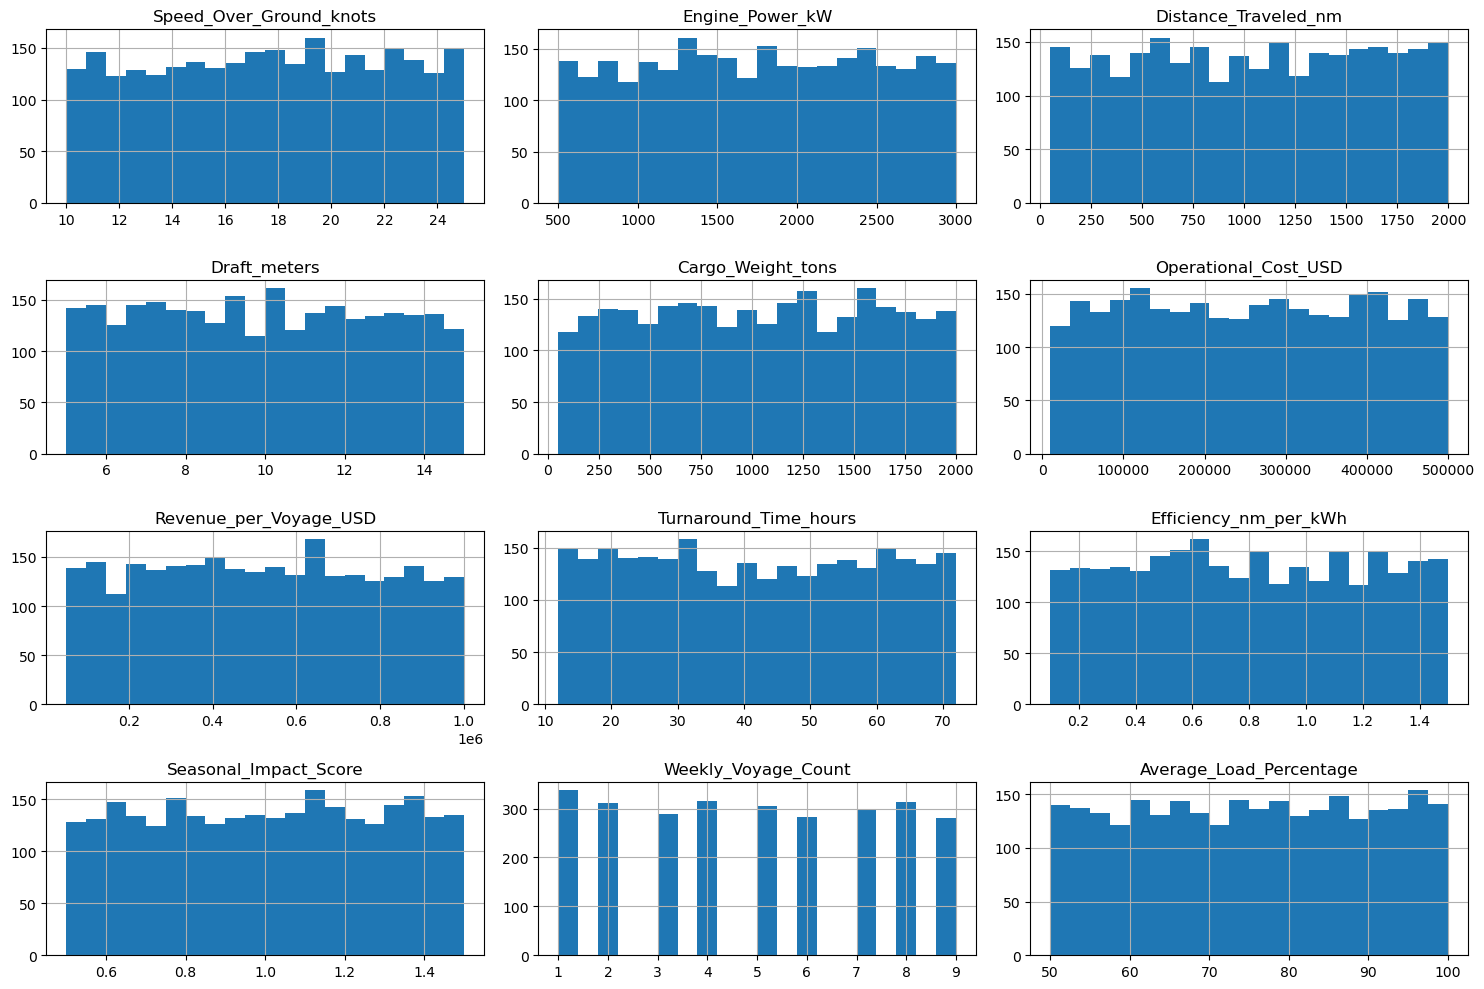

Correlation Heatmap:


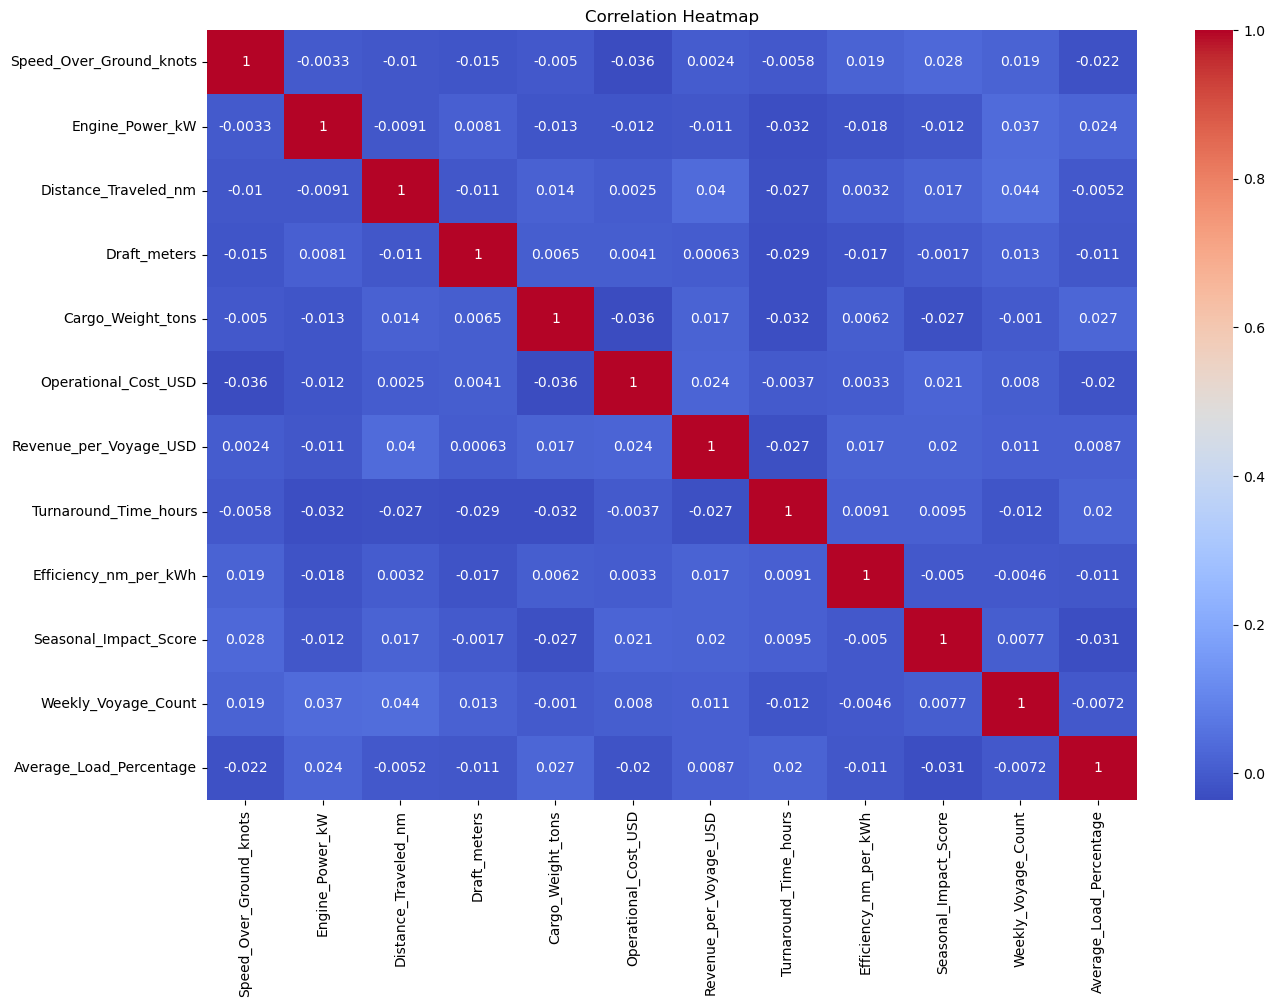

Box Plots for Numerical Variables:


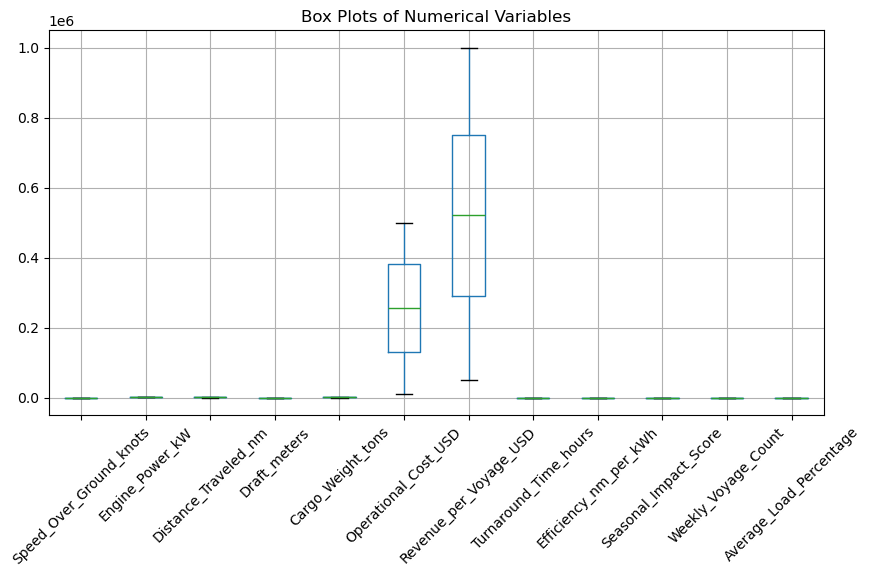

In [10]:
Distribution_Numerical(df)

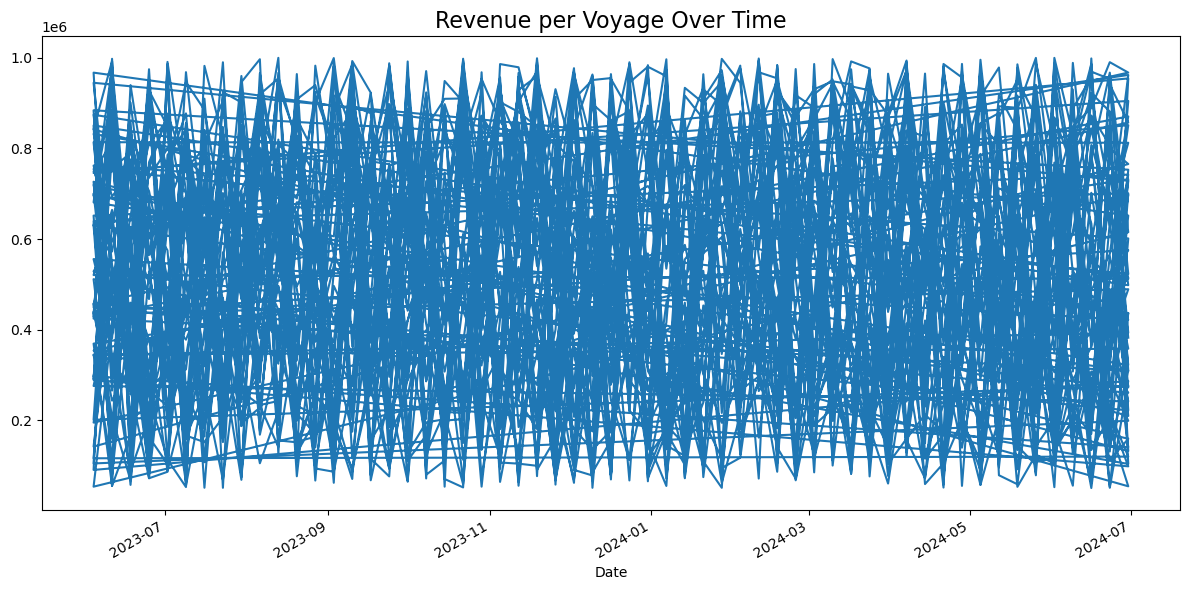

C:\Users\dell\AppData\Local\Temp\ipykernel_3928\506902739.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df['Revenue_per_Voyage_USD'].resample('M').mean()


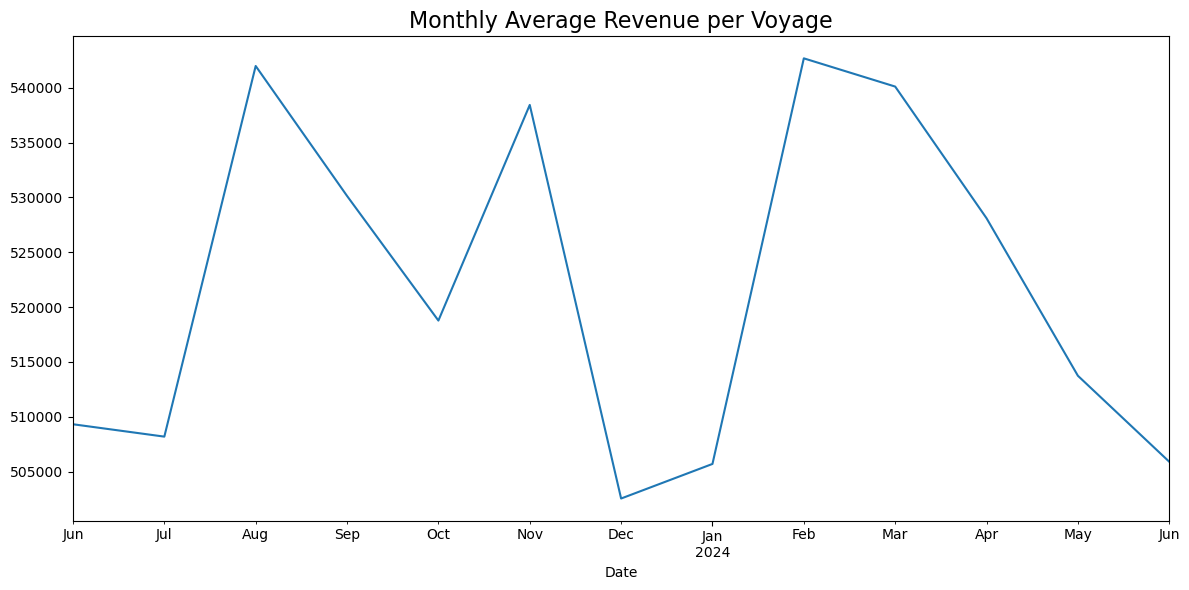

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
df['Revenue_per_Voyage_USD'].plot()
plt.title('Revenue per Voyage Over Time', fontsize=16)
plt.tight_layout()
plt.show()

# Monthly average revenue
monthly_revenue = df['Revenue_per_Voyage_USD'].resample('M').mean()
plt.figure(figsize=(12, 6))
monthly_revenue.plot()
plt.title('Monthly Average Revenue per Voyage', fontsize=16)
plt.tight_layout()
plt.show()

In [12]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [13]:
# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_cols])

In [14]:
# Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [15]:
# Find number of cluster
max_clusters = 10
inertias = []
silhouette_scores = []

K=2, Silhouette Score: 0.063
K=3, Silhouette Score: 0.056
K=4, Silhouette Score: 0.057
K=5, Silhouette Score: 0.055
K=6, Silhouette Score: 0.056
K=7, Silhouette Score: 0.058
K=8, Silhouette Score: 0.059
K=9, Silhouette Score: 0.059
K=10, Silhouette Score: 0.060


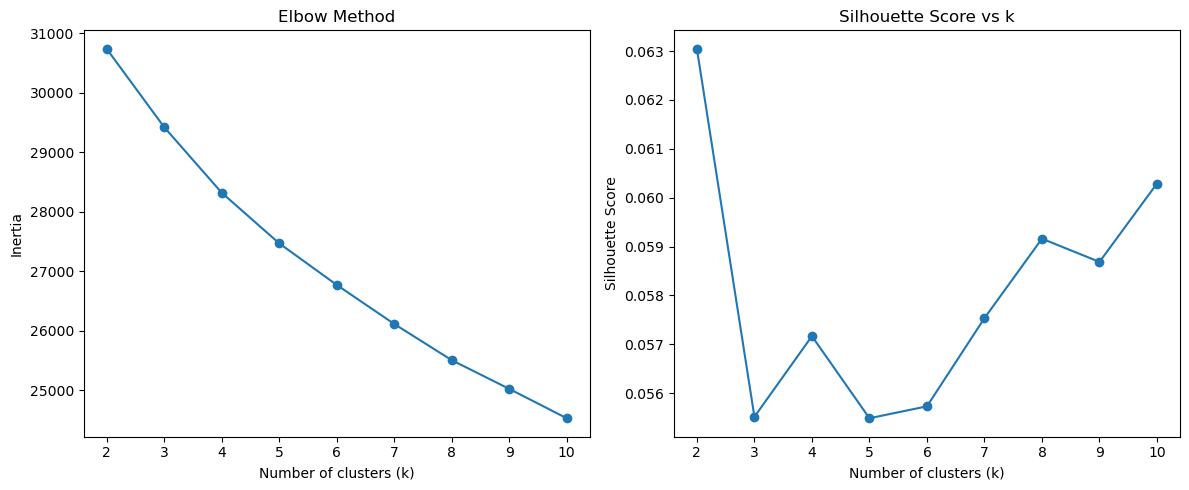

In [16]:
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score: {score:.3f}")

# Create x-axis for plotting
k_values = list(range(2, max_clusters + 1))

# Plot elbow curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First subplot - Elbow Method
ax1.plot(k_values, inertias, marker='o')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')

# Second subplot - Silhouette Scores
ax2.plot(k_values, silhouette_scores, marker='o')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs k')

plt.tight_layout()
plt.show()

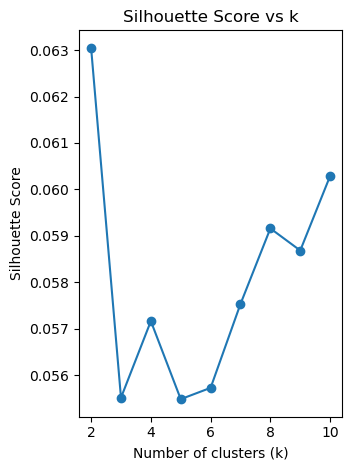

In [17]:
# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.tight_layout()
plt.show()

In [18]:
# Get optimal k from silhouette scores
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

Optimal number of clusters based on silhouette score: 2


In [19]:
# Perform final clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
clusters = final_kmeans.fit_predict(X_pca)

In [20]:
# Add clusters to dataframe
df['Cluster'] = clusters

In [21]:
# Analyze clusters
print("\nCluster Analysis:")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Statistics:")
    cluster_data = df[df['Cluster'] == cluster]
    
    print(f"Number of ships: {len(cluster_data)}")
    
    # Calculate mean values for key metrics
    print("\nMean values:")
    for col in numerical_cols:
        print(f"{col}: {cluster_data[col].mean():.2f}")


Cluster Analysis:

Cluster 0 Statistics:
Number of ships: 1387

Mean values:
Speed_Over_Ground_knots: 17.30
Engine_Power_kW: 1670.40
Distance_Traveled_nm: 987.22
Draft_meters: 9.77
Cargo_Weight_tons: 1020.90
Operational_Cost_USD: 250429.81
Revenue_per_Voyage_USD: 496356.19
Turnaround_Time_hours: 43.01
Efficiency_nm_per_kWh: 0.80
Seasonal_Impact_Score: 0.99
Weekly_Voyage_Count: 2.75
Average_Load_Percentage: 75.86

Cluster 1 Statistics:
Number of ships: 1349

Mean values:
Speed_Over_Ground_knots: 17.91
Engine_Power_kW: 1847.28
Distance_Traveled_nm: 1086.98
Draft_meters: 10.09
Cargo_Weight_tons: 1044.58
Operational_Cost_USD: 259989.65
Revenue_per_Voyage_USD: 547072.32
Turnaround_Time_hours: 40.45
Efficiency_nm_per_kWh: 0.80
Seasonal_Impact_Score: 1.02
Weekly_Voyage_Count: 7.14
Average_Load_Percentage: 74.56


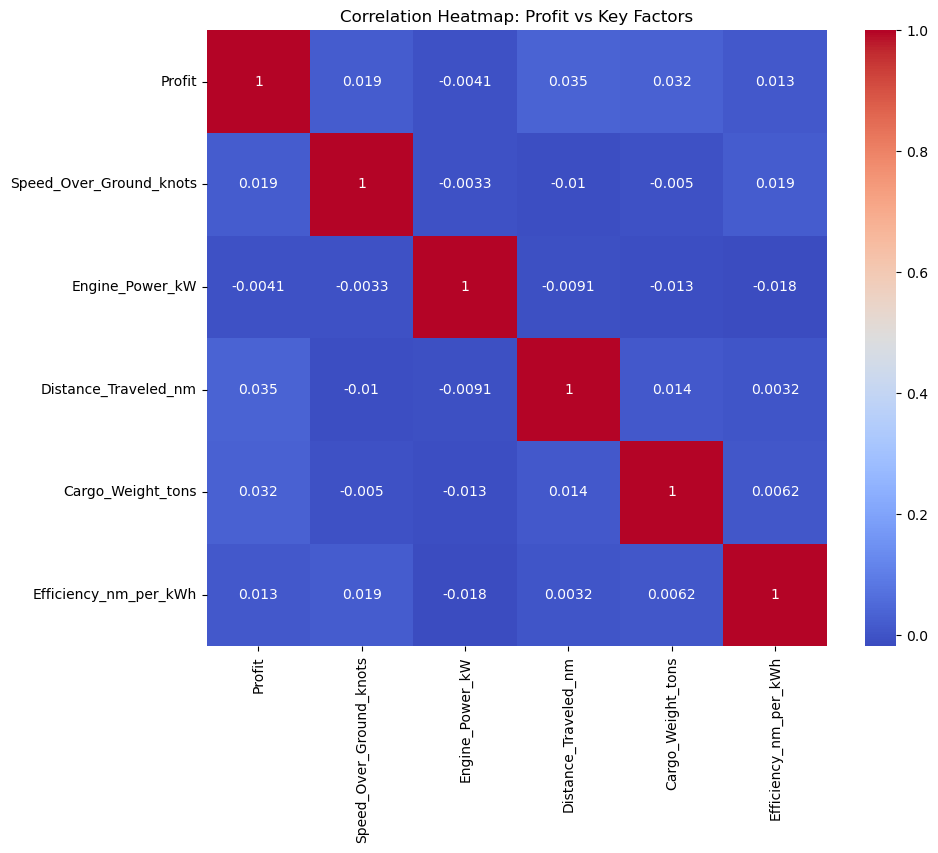

In [22]:
df['Profit'] = df['Revenue_per_Voyage_USD'] - df['Operational_Cost_USD']

correlation_matrix = df[['Profit', 'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Cargo_Weight_tons', 'Efficiency_nm_per_kWh']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Profit vs Key Factors")
plt.show()

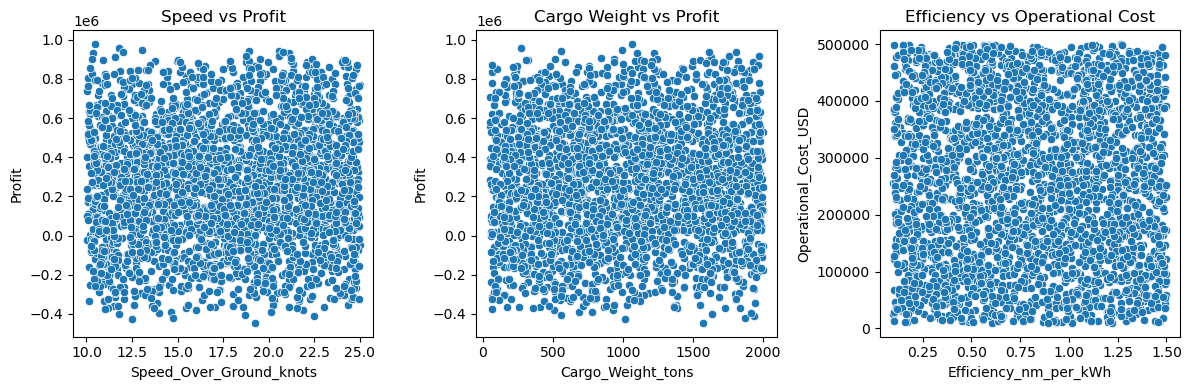

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.scatterplot(x='Speed_Over_Ground_knots', y='Profit', data=df)
plt.title("Speed vs Profit")

plt.subplot(132)
sns.scatterplot(x='Cargo_Weight_tons', y='Profit', data=df)
plt.title("Cargo Weight vs Profit")

plt.subplot(133)
sns.scatterplot(x='Efficiency_nm_per_kWh', y='Operational_Cost_USD', data=df)
plt.title("Efficiency vs Operational Cost")

plt.tight_layout()
plt.show()